https://medium.com/analytics-vidhya/sentiment-analysis-of-tweets-using-tweepy-b67327ac832c

In [ ]:
# !pip install nltk
# !pip install wordcloud
# !pip install tweepy

In [ ]:
import re 
import tweepy 
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')   
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tweepy import OAuthHandler 
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def connect():
  # Replace the xxxxx with your twitter api keys! #THIS IS EXPENSIVE 😅 
  consumer_key = 'H06KzJYXbUpAbZN13O3kdWuYl'
  consumer_secret = 'zeXGdicg5sPonQHms9EIwbkxOVXWGn43P71ZZMdSSdHJeE0m2a'
  access_token = '2322569388-p1HyftGlLAe6ksWYDtXDTq2nsGRluoJOWvY807x'
  access_token_secret = 'j8lONtt5QNzuyvOp7YVeJ8kmmljZZmjHfcuYfZhaUSf82'

  try:
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    return api
  except:
    print("Error")
    exit(1)

In [48]:
def cleanText(text):
  text = text.lower()
  # Removes all mentions (@username) from the tweet since it is of no use to us
  text = re.sub(r'(@[A-Za-z0-9_]+)', '', text)
    
  # Removes any link in the text
  text = re.sub('http://\S+|https://\S+', '', text)

  # Only considers the part of the string with char between a to z or digits and whitespace characters
  # Basically removes punctuation
  text = re.sub(r'[^\w\s]', '', text)

  # Removes stop words that have no use in sentiment analysis 
  text_tokens = word_tokenize(text)
  text = [word for word in text_tokens if not word in stopwords.words()]

  text = ' '.join(text)
  return text

In [58]:
def stem(text):
  # This function is used to stem the given sentence
  porter = PorterStemmer()
  token_words = word_tokenize(text)
  stem_sentence = []
  for word in token_words:
    stem_sentence.append(porter.stem(word))
  return " ".join(stem_sentence)

In [ ]:
def sentiment(cleaned_text):
  # Returns the sentiment based on the polarity of the input TextBlob object
  if cleaned_text.sentiment.polarity > 0:
    return 'positive'
  elif cleaned_text.sentiment.polarity < 0:
    return 'negative'
  else:
    return 'neutral'

Sentiment about tweet

In [67]:
api = connect() # Gets the tweepy API object
tweet = api.get_status(id='1586073596417511426')
print(tweet.text)

🇭🇺 It was an absolute honor to have met and interviewed the Hungarian Foreign Minister Péter Szijjártó. Thank you s… https://t.co/2xrs2EmSw9


In [63]:
txt = tweet.text
clean_txt = cleanText(txt) # Cleans the tweet
stem_txt = stem(clean_txt) # Stems the tweet
print(txt)
print(clean_txt)
print(stem_txt)
sent_stem=TextBlob(stem_txt)
print(sent_stem.sentiment.polarity)
print(sentiment(sent_stem))

Regarding Twitter’s reduction in force, unfortunately there is no choice when the company is losing over $4M/day.… https://t.co/beSHf4nXgF
twitters reduction force unfortunately choice company losing 4mday
twitter reduct forc unfortun choic compani lose 4mday
0.0
neutral


In [68]:
txt = tweet.text
sent_raw=TextBlob(txt)
print(txt,sent_raw.sentiment.polarity,sentiment(sent_raw))

clean_txt = cleanText(txt) # Cleans the tweet
sent_clean=TextBlob(clean_txt)
print(clean_txt,sent_clean.sentiment.polarity,sentiment(sent_clean))

stem_txt = stem(clean_txt) # Stems the tweet
sent_stem=TextBlob(stem_txt)
print(stem_txt,sent_stem.sentiment.polarity,sentiment(sent_stem))

🇭🇺 It was an absolute honor to have met and interviewed the Hungarian Foreign Minister Péter Szijjártó. Thank you s… https://t.co/2xrs2EmSw9 0.037500000000000006 positive
absolute honor interviewed hungarian foreign minister péter szijjártó 0.037500000000000006 positive
absolut honor interview hungarian foreign minist péter szijjártó -0.125 negative


Sentiment about topic

In [69]:
def fetch_tweets(query, count = 200):
  api = connect() # Gets the tweepy API object
  tweets = [] # Empty list that stores all the tweets

  try:
    # Fetches the tweets using the api
    fetched_data = api.search(q = query + ' -filter:retweets', 
count = count)
    for tweet in fetched_data:
      txt = tweet.text
      clean_txt = cleanText(txt) # Cleans the tweet
      stem_txt = TextBlob(stem(clean_txt)) # Stems the tweet
      sent = sentiment(stem_txt) # Gets the sentiment from the tweet
      tweets.append((txt, clean_txt, sent))
    return tweets
  except tweepy.TweepError as e:
    print("Error : " + str(e))
    exit(1)

In [73]:
tweets = fetch_tweets(query = 'nuclear energy', count = 500)
# Converting the list into a pandas Dataframe
df = pd.DataFrame(tweets, columns= ['tweets', 'clean_tweets','sentiment'])

# Dropping the duplicate values just in case there are some tweets that are copied and then stores the data in a csv file
df = df.drop_duplicates(subset='clean_tweets')
df.to_csv('data.csv', index= False)
ptweets = df[df['sentiment'] == 'positive']
p_perc = 100 * len(ptweets)/len(tweets)
ntweets = df[df['sentiment'] == 'negative']
n_perc = 100 * len(ntweets)/len(tweets)
print(f'Positive tweets {p_perc} %')
print(f'Neutral tweets {100 - p_perc - n_perc} %')
print(f'Negative tweets {n_perc} %')

Positive tweets 20.0 %
Neutral tweets 62.0 %
Negative tweets 18.0 %


In [80]:
df.head()

,tweets,clean_tweets,sentiment
0,@PGRodriguez80 @dmf618 @NCNative65 @laurenboeb...,nuclear unfortunately fortunately long term an...,negative
1,@jasndoc @ShellenbergerMD Does data matter to ...,data matter single data point data 3 billion,neutral
2,@H1eronymus @wordofthedayeng Not a Trump fan b...,trump enjoy safety security nuclear economic,positive
3,They simply don’t know how the world works. \n...,simply world works greenies leverage natural g...,neutral
4,"@BrianCanadien @casperj33081634 Actually, star...",starting highenergydensity nuclear powered bas...,neutral


In [86]:
df[df['clean_tweets']==[i for i in df['clean_tweets'].to_list() if 'pigeon' in i][0]]['tweets'].to_list()[0]

'@Broufus with a man who has brain size of a pigeon you’d have to be very extremely optimistic, but clearly we seein… https://t.co/ibZpGd784d'

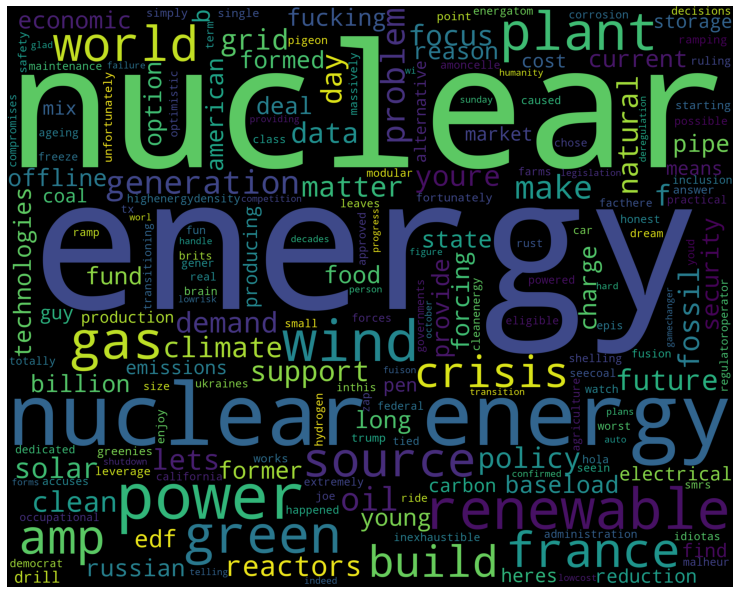

In [75]:
twt = " ".join(df['clean_tweets'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=2500, height=2000).generate(twt)

plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()